Training set shape: (25000, 200) (25000,)
Test set shape: (25000, 200) (25000,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 828ms/step - accuracy: 0.5087 - loss: 0.6934 - val_accuracy: 0.5322 - val_loss: 0.6860
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 153s 897ms/step - accuracy: 0.5618 - loss: 0.6732 - val_accuracy: 0.6256 - val_loss: 0.6145
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 129s 815ms/step - accuracy: 0.6740 - loss: 0.5715 - val_accuracy: 0.7362 - val_loss: 0.5601
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 108ms/step - accuracy: 0.7126 - loss: 0.5881

Test Accuracy: 0.7105


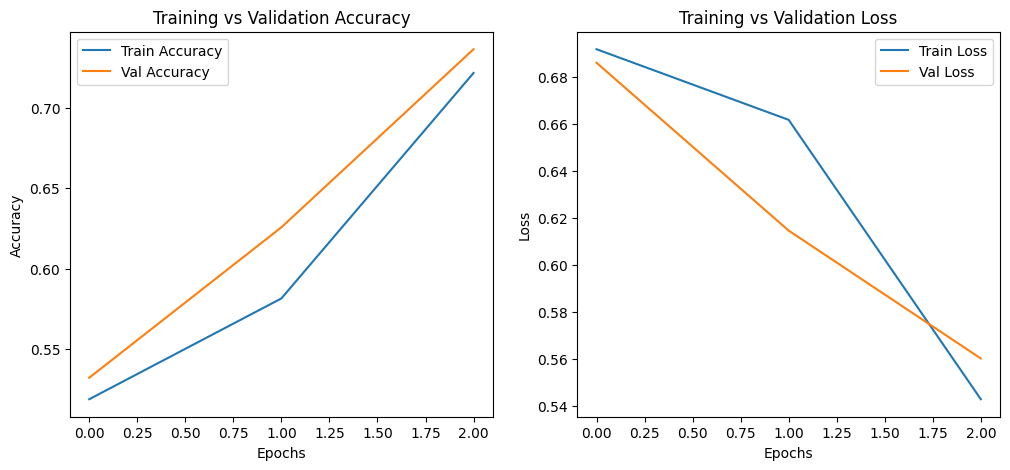

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

#QUESTION 1: FEED-FORWARD NEURAL NETWORK

#TASK: IMPLEMENT A FEED-FORWARD NEURAL NETWORK FOR HANDWIRTTEN DIGIT CLASSIFICATION

#DATASET: MNIST

#Loading the MNIST handwritten digits data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #Split the dataset into training and testing set and return numpy arrays
x_train, x_test = x_train/255.0, x_test/255.0 #Normalization of the binary image between 0-1

#INSTRUCTIONS

#Feed-Forward Neural Network
fnn = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'), #2 hidden layers with Relu activation
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  #Output layer 'softmax' with 10 classes
])

fnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fnn.summary()

#Trainig the model: The model will train for 3 epochs
history = fnn.fit(
    x_train,
    y_train,
    epochs=3,
    batch_size=32,
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1
)

#Evaluateing the model on the test dataset
test_loss, test_accuracy = fnn.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.4f}")

#Making predictions: Predict the digit for the first 10 images in the test set
predictions = fnn.predict(x_test[:10])

#Geting the predicted class (the one with the highest probability)
predicted_classes = [tf.argmax(pred).numpy() for pred in predictions]

print("\nSample predictions:")
for i in range(10):
    true_label = y_test[i]
    predicted_label = predicted_classes[i]
    print(f"Image {i}: True label = {true_label}, Predicted label = {predicted_label}")

#Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 5))

#Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#QUESTION 2: CONVOLUTIONAL NEURAL NETWORK

#TASK: IMPLEMENT A CNN FOR IMAGE CLASSIFICATION

#DATASET: MNIST

#INSTRUCTIONS

#CNN: Reshaping the data to include the channel dimension (1 for grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"Shape of training data: {x_train.shape}")
print(f"Shape of testing data: {x_test.shape}")
print(f"Shape of a single image: {x_train[0].shape}")

#Building a CNN model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  #Convolutional layers with Relu
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  #Max Pooling layers
    layers.Dropout(0.25), #Dropout layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'), #Fully connected dense layers
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

#Training the CNN model
print("\nTraining the model")
history = cnn.fit(
    x_train,
    y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1
)

#Evaluating the CNN model
print("\nEvaluating the model...")
test_loss, test_accuracy = cnn.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.4f}")

#Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Visualizing Feature Maps: Getting the output of the first convolutional layer
# Dynamically get the name of the first Conv2D layer
conv_layers = [layer.name for layer in cnn.layers if isinstance(layer, layers.Conv2D)]
if conv_layers:
  layer_name = conv_layers[0]
  feature_extractor = keras.Model(inputs=cnn.inputs, outputs=cnn.get_layer(layer_name).output)

  #Choosing a sample image from the test set
  sample_image_index = 42 # Change this index to view different examples
  sample_image = x_test[sample_image_index]
  sample_image_label = y_test[sample_image_index]

  #Adding a batch dimension to the image
  sample_image_batch = np.expand_dims(sample_image, axis=0)

  #Getting the feature maps for the sample image
  feature_maps = feature_extractor.predict(sample_image_batch)

  #Checking if feature_maps is not empty before attempting to plot
  if feature_maps.shape[0] > 0:
    #Plotting the original image
    plt.figure(figsize=(18, 8)) # Adjusted figure size for wider plot
    plt.subplot(4, 9, 1) # Use 4 rows, 9 columns, and the first subplot
    plt.imshow(sample_image[:, :, 0], cmap='gray')
    plt.title(f"Original\n({sample_image_label})")
    plt.axis('off')

    #Plotting each feature map
    print(f"\nVisualizing feature maps from '{layer_name}' ({feature_maps.shape[-1]} maps)...")
    for i in range(feature_maps.shape[-1]):
        plt.subplot(4, 9, i + 2) # Use 4 rows, 9 columns, and start from the second subplot
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.title(f"Map {i+1}")
        plt.axis('off')

    plt.suptitle(f"Feature Maps from {layer_name} for Digit {sample_image_label}", fontsize=16)
    plt.tight_layout()
    plt.show()
  else:
    print("No feature maps were generated.")
else:
  print("No Conv2D layers found in the model.")

#QUESTION 3: RECURRENT NEURAL NETWORK (RNN/LSTM)

#TASK: IMPLEMENT AN RNN/LSTM MODEL FOR TEXT CLASSIFICATION (SENTIMENT ANALYSIS)

#DATASET: IMDB dataset from tensorflow.keras.datasets

#Loading dataset
vocab_size = 20000   # number of unique words to consider
max_len = 200        # maximum review length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

#Padding sequences
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test  = pad_sequences(X_test,  maxlen=max_len, padding='post', truncating='post')

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

#Building LSTM model
embedding_dim = 128

rnn = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    layers.LSTM(128, return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])

#Compiling
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn.summary()

#Training
history = rnn.fit(
    X_train, y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

#Evaluating
test_loss, test_acc = rnn.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")

#Plotting accuracy & loss
plt.figure(figsize=(12, 5))

#Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()